In [2]:
from jenga.tasks.shoes import ShoeCategorizationTask

## Distinguish images of sneakers from images of ankle boots

In [ ]:
task = ShoeCategorizationTask()

In [3]:
train_data = task.train_images
y_train = task.train_labels

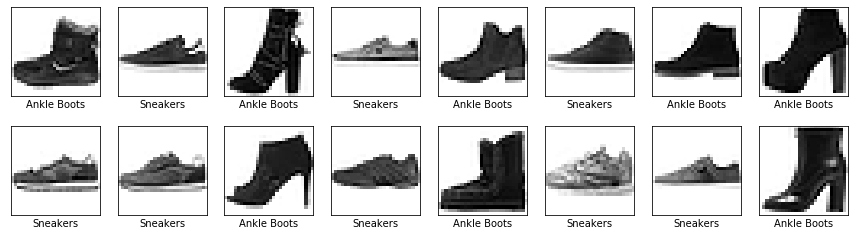

In [9]:
import matplotlib.pyplot as plt

classes = ['Sneakers', 'Ankle Boots']

plt.figure(figsize=(15, 4))
for i in range(16):
    plt.subplot(2,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_data[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])
plt.show()

### Fit a baseline model (CNN)

In [10]:
model = task.fit_baseline_model(train_data, y_train)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
12000/12000 [==============================] - 7s 604us/sample - loss: 0.1712 - acc: 0.9341


### Investigate its prediction quality on unseen images

In [11]:
predicted_classes = model.predict_classes(task.test_images)
print("Accuracy on clean test set", task.score_on_test_images(predicted_classes))

Accuracy on clean test set 0.9575


### Investigate the effect of data corruptions on the prediction quality

In [13]:
from jenga.corruptions.image import GaussianNoise

corruption = GaussianNoise(fraction=0.8)
noisy_test_images = corruption.transform(task.test_images)

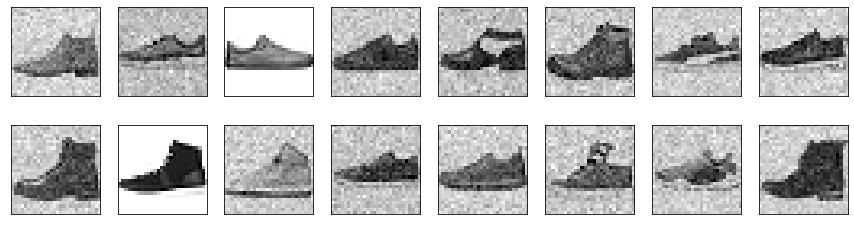

In [14]:
plt.figure(figsize=(15, 4))
for i in range(16):
    plt.subplot(2,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(noisy_test_images[i], cmap=plt.cm.binary)
plt.show()

In [15]:
predicted_classes = model.predict_classes(noisy_test_images)
print("Accuracy on noisy test set", task.score_on_test_images(predicted_classes))

Accuracy on noisy test set 0.915
